# 実装して理解する(実装例)(正規化回帰モデル)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

In [2]:
class ModelFrame:
    def __init__(self):
        self.param={}
    
    def fit(self, x, t):
        """
        input, labelを受け取って、パラメータを求める
        """
        pass
    
    def predict(self, data):
        """
        inputを受け取って、fitで求めたパラメータを使って推測したlabelを返す
        """
        pass

In [3]:
class LinearModel(ModelFrame):
    def __init__(self, M=3, p_lambda=0.01):
        super(LinearModel, self).__init__()
        self.param["M"] = M
        self.param["lambda"] = p_lambda

    def __phi_multi(self, x):
        """
        M-1次多項式基底
        """
        return [np.power(x,i) for i in range(self.param["M"])]

    def fit(self, x, t):
        PHI = np.array([self.__phi_multi(x) for x in X])
        self.param["w"] = np.dot(
                                        np.linalg.inv(
                                            self.param["lambda"]*np.identity(self.param["M"]) + \
                                            np.dot(PHI.T, PHI)
                                            ),
                                        np.dot(PHI.T, t)
                                    )

    def __f(self, x):
        _w = self.param["w"]
        _phi = self.__phi_multi(x)
        _f = np.dot(_w, _phi)

        return _f

    def predict(self, x):
        predicted_t = self.__f(x)
        return predicted_t

## 線形モデルにより最尤解を求める

In [4]:
def experiment(X, t, M=5, true_f=None,p_lambda=0):
    # 最尤推定
    linear_model = LinearModel(M, p_lambda=p_lambda)
    linear_model.fit(X, t)
    _X = np.linspace(X.min(), X.max(), 100) # プロット用のデータ用意
    predicted_t = linear_model.predict(_X)

    # プロット
    plt.figure(figsize=[12,4])
    plt.title(f"M={M}, N={len(X)}, lambda={p_lambda}", fontsize=20)
    if true_f is not None:
        plt.plot(_X, true_f(_X), label="true f", linewidth=3, alpha=1, c="r")
    plt.scatter(X, t, label="input data", s=80, alpha=1/np.log10(len(X))**3)
    plt.plot(_X, predicted_t, label="predicted f", linewidth=3, alpha=1, c="g")
    plt.legend(fontsize=20)
    plt.show(); plt.close()

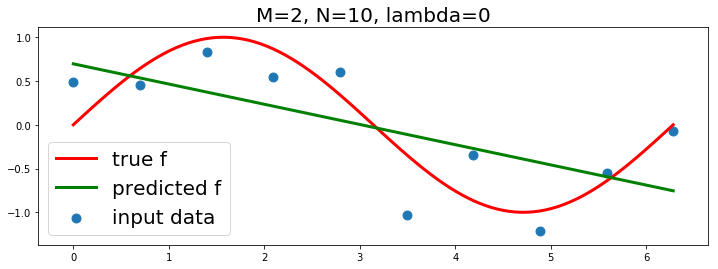

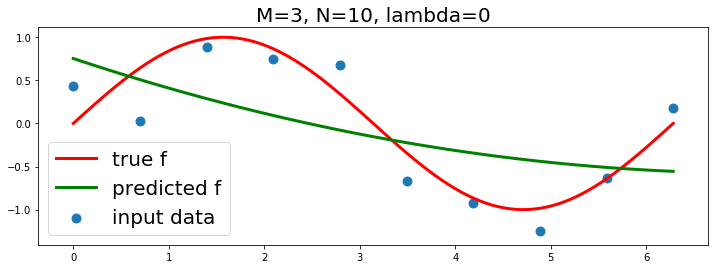

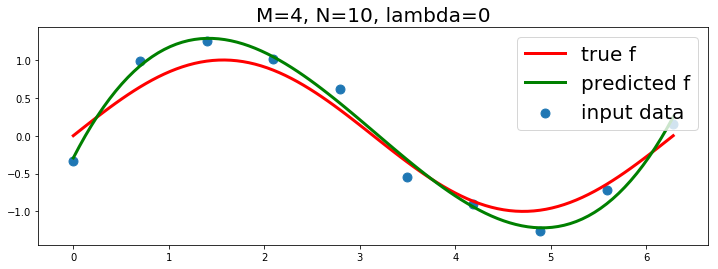

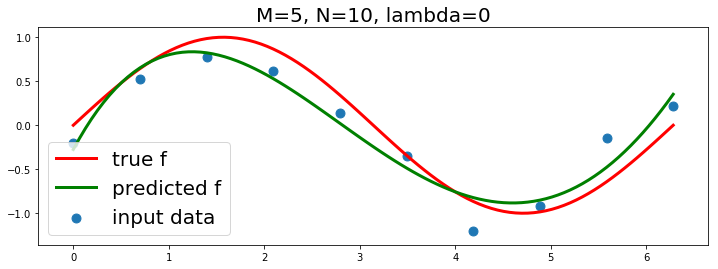

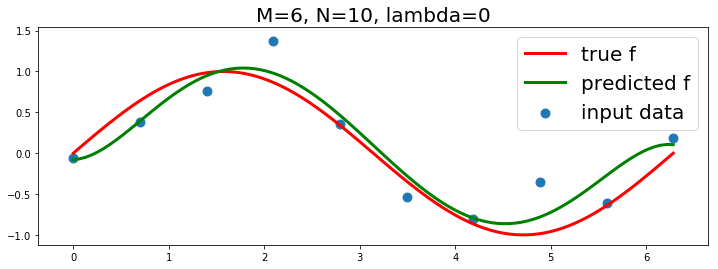

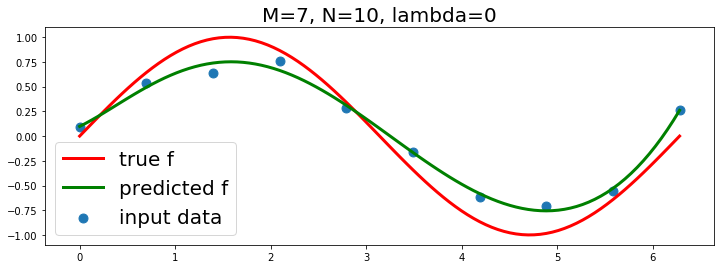

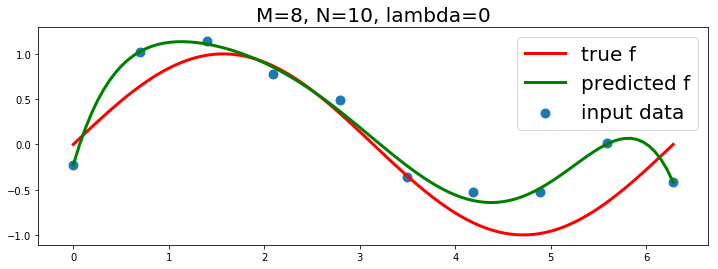

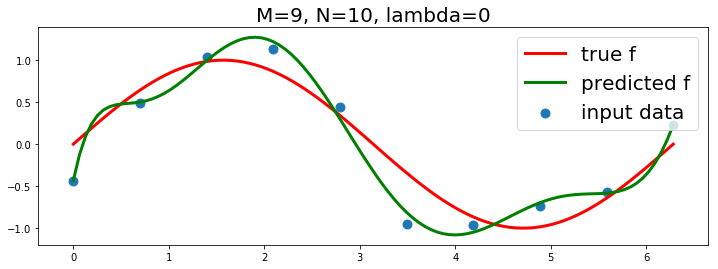

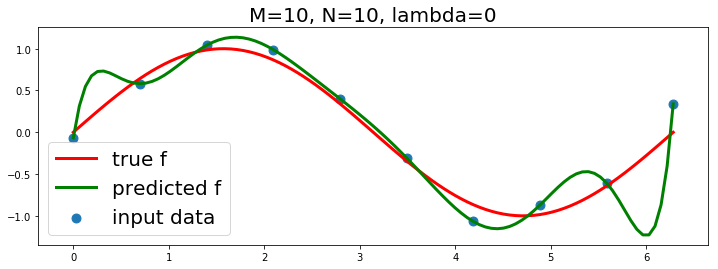

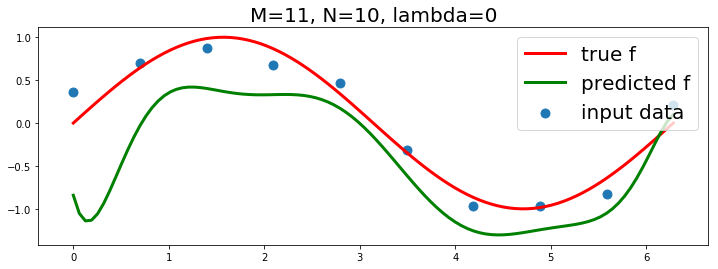

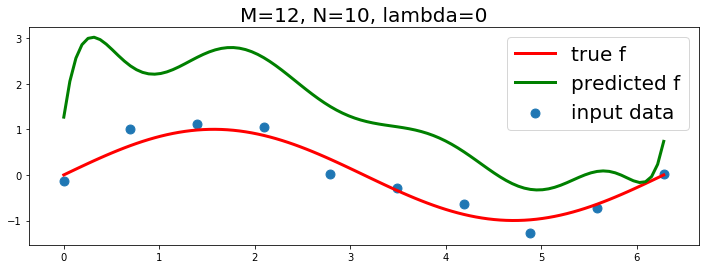

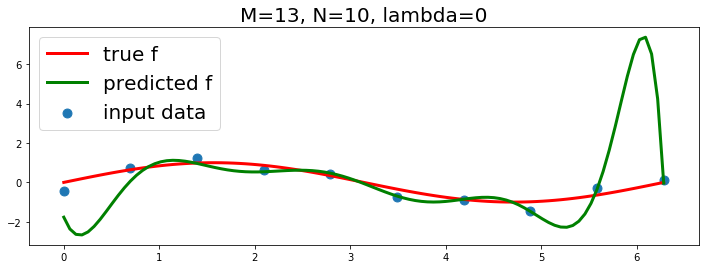

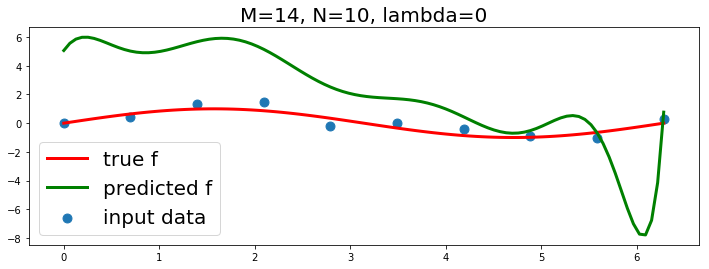

In [5]:
# for N in np.logspace(2,3, 2, dtype=int):
for M in range(2,15):
# for l in np.logspace(-10,0,10):
    N=10
#     M = 8
    X = np.linspace(0, 2*np.pi, N)
    t = np.sin(X) + np.random.normal(0, 0.3, N)
    experiment(X, t, M=M, true_f=np.sin, p_lambda=0)